# COVID-19 France Cases Data Vizualisation Notebook
------------------

### Importing Libraries

In [1]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [2]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562


In [4]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38032,38099,38141,38200,38250,38252,38336,38475,38505,38540
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,23072,23609,24136,24520,24820,24820,25876,26381,26898,27426
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,58146,59135,59590,60028,60457,60888,61307,61700,62089,62487
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6452,6505,6598,6629,6629,6706,6706,6819,6875,6919
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8579,8679,8798,8841,8898,8924,8990,9194,9266,9345


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1919,1935,1945,1956,1965,1969,1995,2011,2025,2030
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,951,965,977,989,1003,1016,1028,1040,1055,1066
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2554,2564,2575,2584,2596,2609,2623,2631,2640,2647
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,78,78,78,78,79,79,79,79,79,80
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,358,362,365,366,371,372,372,379,382,384


#### Check the shape of the dataframes

In [6]:
confirmed_df.shape

(271, 336)

In [7]:
recoveries_df.shape

(256, 336)

In [8]:
deaths_df.shape

(271, 336)

### Delete the useless columns

In [9]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621
1,Albania,0,0,0,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004
2,Algeria,0,0,0,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371
3,Andorra,0,0,0,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519
4,Angola,0,0,0,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562


In [10]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38032,38099,38141,38200,38250,38252,38336,38475,38505,38540
1,Albania,0,0,0,0,0,0,0,0,0,...,23072,23609,24136,24520,24820,24820,25876,26381,26898,27426
2,Algeria,0,0,0,0,0,0,0,0,0,...,58146,59135,59590,60028,60457,60888,61307,61700,62089,62487
3,Andorra,0,0,0,0,0,0,0,0,0,...,6452,6505,6598,6629,6629,6706,6706,6819,6875,6919
4,Angola,0,0,0,0,0,0,0,0,0,...,8579,8679,8798,8841,8898,8924,8990,9194,9266,9345


In [11]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1919,1935,1945,1956,1965,1969,1995,2011,2025,2030
1,Albania,0,0,0,0,0,0,0,0,0,...,951,965,977,989,1003,1016,1028,1040,1055,1066
2,Algeria,0,0,0,0,0,0,0,0,0,...,2554,2564,2575,2584,2596,2609,2623,2631,2640,2647
3,Andorra,0,0,0,0,0,0,0,0,0,...,78,78,78,78,79,79,79,79,79,80
4,Angola,0,0,0,0,0,0,0,0,0,...,358,362,365,366,371,372,372,379,382,384


### Aggregate rows by Country

In [12]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621
Albania,0,0,0,0,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004
Algeria,0,0,0,0,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371
Andorra,0,0,0,0,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519
Angola,0,0,0,0,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562


In [13]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38032,38099,38141,38200,38250,38252,38336,38475,38505,38540
Albania,0,0,0,0,0,0,0,0,0,0,...,23072,23609,24136,24520,24820,24820,25876,26381,26898,27426
Algeria,0,0,0,0,0,0,0,0,0,0,...,58146,59135,59590,60028,60457,60888,61307,61700,62089,62487
Andorra,0,0,0,0,0,0,0,0,0,0,...,6452,6505,6598,6629,6629,6706,6706,6819,6875,6919
Angola,0,0,0,0,0,0,0,0,0,0,...,8579,8679,8798,8841,8898,8924,8990,9194,9266,9345


In [14]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1919,1935,1945,1956,1965,1969,1995,2011,2025,2030
Albania,0,0,0,0,0,0,0,0,0,0,...,951,965,977,989,1003,1016,1028,1040,1055,1066
Algeria,0,0,0,0,0,0,0,0,0,0,...,2554,2564,2575,2584,2596,2609,2623,2631,2640,2647
Andorra,0,0,0,0,0,0,0,0,0,0,...,78,78,78,78,79,79,79,79,79,80
Angola,0,0,0,0,0,0,0,0,0,0,...,358,362,365,366,371,372,372,379,382,384


#### Check the shape of the new dataframes

In [15]:
confirmed_df_aggregated.shape

(191, 332)

In [16]:
recoveries_df_aggregated.shape

(191, 332)

In [17]:
deaths_df_aggregated.shape

(191, 332)

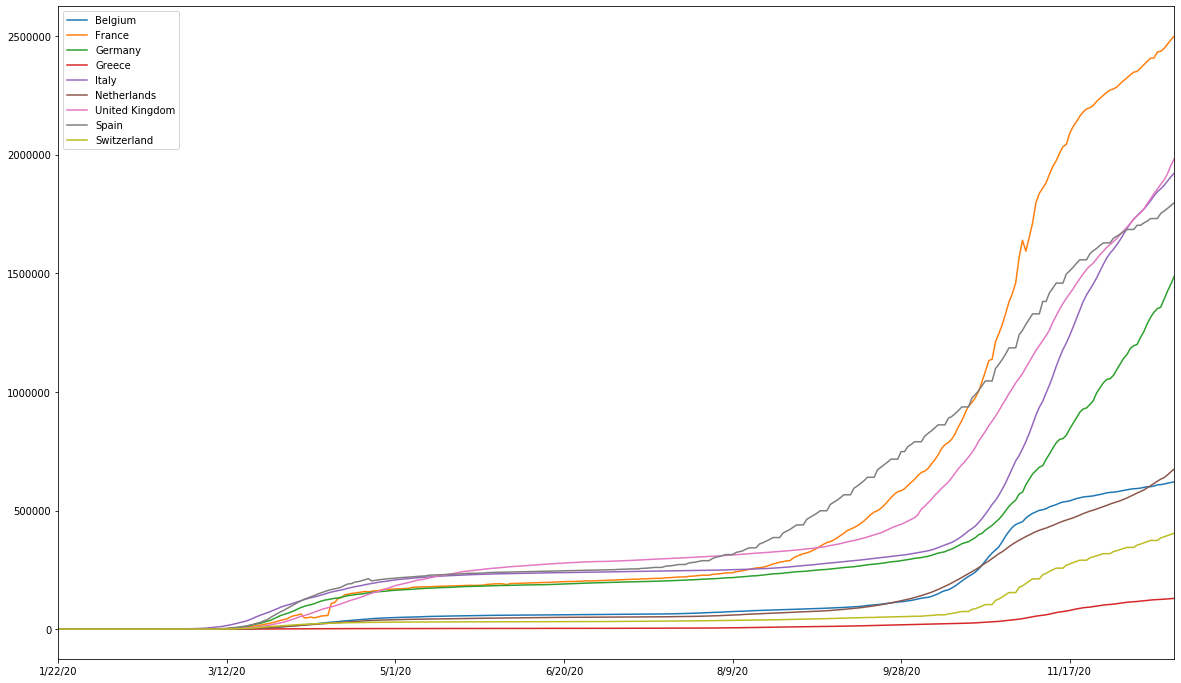

In [18]:
plt.figure(figsize=(20, 12))
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Greece"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Netherlands"].plot()
confirmed_df_aggregated.loc ["United Kingdom"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
confirmed_df_aggregated.loc ["Switzerland"].plot()
plt.legend()

In [19]:
confirmed_df = confirmed_df[confirmed_df['Country/Region']=='France']
deaths_df = deaths_df[deaths_df['Country/Region']=='France']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='France']

In [20]:
confirmed_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
deaths_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)
recoveries_df.drop(['1/22/20', '1/23/20'], axis=1, inplace=True)

In [21]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [22]:
### Replace NaN values by 0
confirmed_df.fillna(0, inplace=True)
deaths_df.fillna(0, inplace=True)
recoveries_df.fillna(0, inplace=True)

In [23]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [24]:
###Convert integer into datetime for better visualization
start = '1/24/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [25]:
dates = confirmed.keys()
france_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    france_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [26]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
france_cases = np.array(france_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [27]:
###Future forecast
days_in_future = 1
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-1]

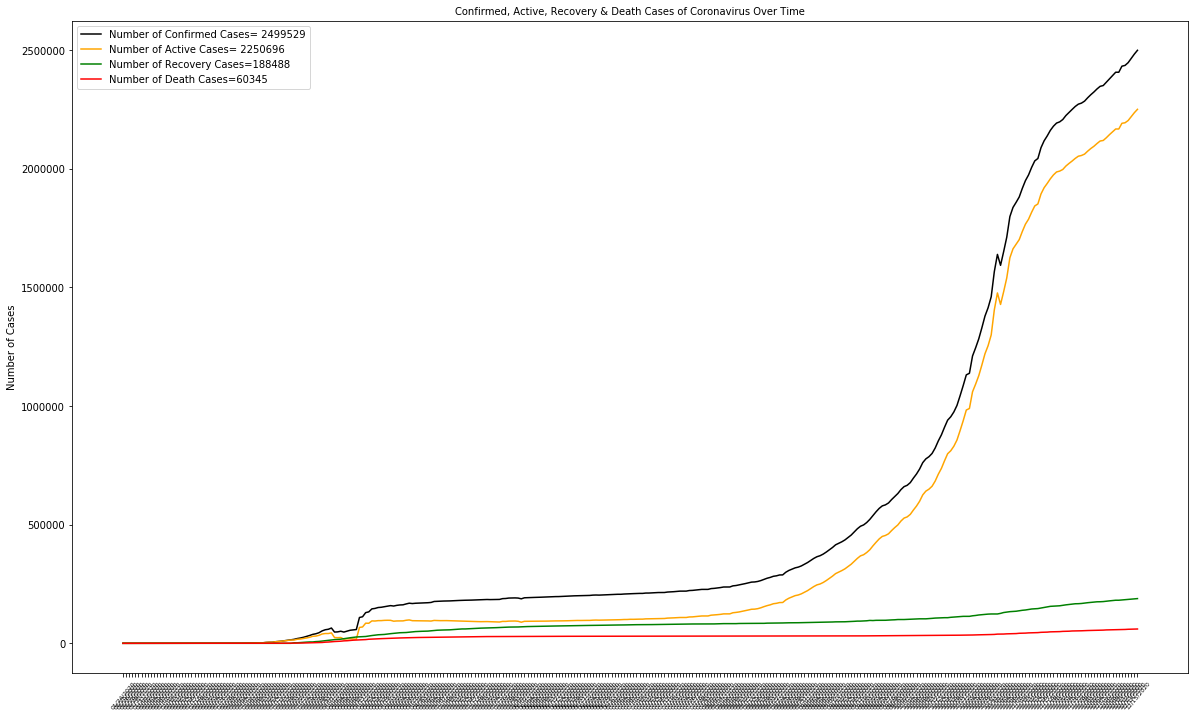

In [28]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, france_cases, color='black')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=10)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=10)
plt.ylabel('Number of Cases', size=10)
plt.xticks(rotation=50, size=6)
plt.show()

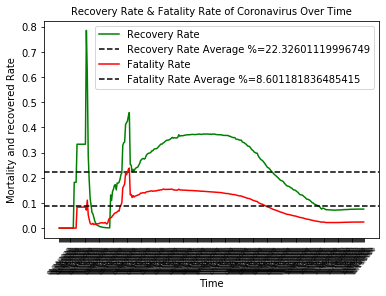

In [29]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=10)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper right', fontsize=10)
plt.xlabel('Time')
plt.ylabel('Mortality and recovered Rate')
plt.xticks(rotation=50, size=6)
plt.show()

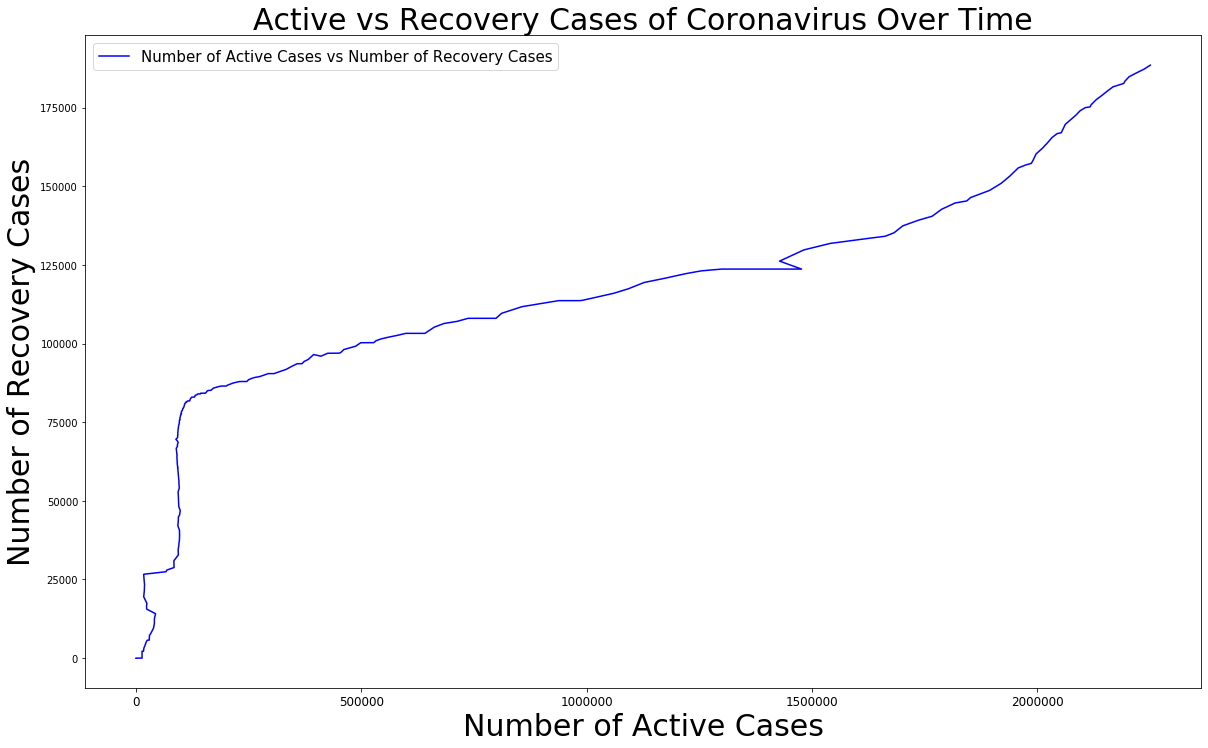

In [30]:
##Active vs recovered Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, total_recovered, color='blue')
plt.title('Active vs Recovery Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases vs Number of Recovery Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=12)
plt.show()